In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
# Load CSV normally
df = pd.read_csv("vgsales.csv")

# Select only numeric columns for clustering
sales_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].dropna()


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

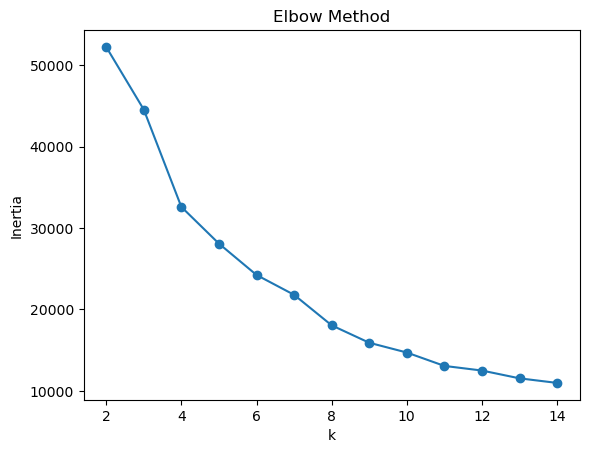

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(2, 15):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

plt.plot(range(2, 15), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
# Choose the columns you want to display with the cluster label
clustered_table = df[['Name', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Cluster']]

# Display the first 20 rows (or however many you want)
print(clustered_table.head(20).to_string(index=False))


                                        Name Platform        Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales  Cluster
                                  Wii Sports      Wii       Sports     41.49     29.02      3.77         82.74        2
                           Super Mario Bros.      NES     Platform     29.08      3.58      6.81         40.24        1
                              Mario Kart Wii      Wii       Racing     15.85     12.88      3.79         35.82        1
                           Wii Sports Resort      Wii       Sports     15.75     11.01      3.28         33.00        1
                    Pokemon Red/Pokemon Blue       GB Role-Playing     11.27      8.89     10.22         31.37        1
                                      Tetris       GB       Puzzle     23.20      2.26      4.22         30.26        1
                       New Super Mario Bros.       DS     Platform     11.38      9.23      6.50         30.01        1
                                    Wii 